# machine-learning-project

Use the "Run" button to execute the code.

Here's an outline of the project:
1. Download the Dataset
2. Explore & analyse the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Perform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with entire dataset
10. Document & publish the project online

# 1. Download the Dataset

Steps:
- Install important libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

## Install Important Libraries

In [ ]:
!pip install opendatasets pandas numpy matplotlib==3.1.3 seaborn plotly scikit-learn xgboost --quiet

     |████████████████████████████████| 13.1 MB 5.2 MB/s 


## Download Data from Kaggle

In [ ]:
import opendatasets as od

In [ ]:
dataset_url='https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data'

In [ ]:
od.download(dataset_url)

100%|██████████| 21.4M/21.4M [00:00<00:00, 92.8MB/s]



Extracting archive ./store-sales-time-series-forecasting/store-sales-time-series-forecasting.zip to ./store-sales-time-series-forecasting


In [ ]:
data_dir='store-sales-time-series-forecasting'

## View Dataset Files
Let's look at the size, no. of lines and first few lines of each file.


In [ ]:
!ls -lh {data_dir}

total 119M
-rw-r--r-- 1 root root  22K Dec  3 06:20 holidays_events.csv
-rw-r--r-- 1 root root  21K Dec  3 06:20 oil.csv
-rw-r--r-- 1 root root 335K Dec  3 06:20 sample_submission.csv
-rw-r--r-- 1 root root 1.4K Dec  3 06:20 stores.csv
-rw-r--r-- 1 root root 999K Dec  3 06:20 test.csv
-rw-r--r-- 1 root root 117M Dec  3 06:20 train.csv
-rw-r--r-- 1 root root 1.5M Dec  3 06:20 transactions.csv


In [ ]:
!wc -l {data_dir}/train.csv

3000889 store-sales-time-series-forecasting/train.csv


In [ ]:
!wc -l {data_dir}/holidays_events.csv

351 store-sales-time-series-forecasting/holidays_events.csv


In [ ]:
!wc -l {data_dir}/oil.csv

1219 store-sales-time-series-forecasting/oil.csv


In [ ]:
!wc -l {data_dir}/test.csv

28513 store-sales-time-series-forecasting/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

28513 store-sales-time-series-forecasting/sample_submission.csv


In [ ]:
!wc -l {data_dir}/stores.csv

55 store-sales-time-series-forecasting/stores.csv


In [ ]:
!wc -l {data_dir}/transactions.csv

83489 store-sales-time-series-forecasting/transactions.csv


In [ ]:
!head {data_dir}/train.csv

id,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,2013-01-01,1,CELEBRATION,0.0,0
7,2013-01-01,1,CLEANING,0.0,0
8,2013-01-01,1,DAIRY,0.0,0


In [ ]:
!head {data_dir}/test.csv

id,date,store_nbr,family,onpromotion
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
3000893,2017-08-16,1,BREAD/BAKERY,12
3000894,2017-08-16,1,CELEBRATION,0
3000895,2017-08-16,1,CLEANING,25
3000896,2017-08-16,1,DAIRY,45


In [ ]:
!head {data_dir}/holidays_events.csv

date,type,locale,locale_name,description,transferred
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False


In [ ]:
!head {data_dir}/oil.csv

date,dcoilwtico
2013-01-01,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.2
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.6


In [ ]:
!head {data_dir}/stores.csv

store_nbr,city,state,type,cluster
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [ ]:
!head {data_dir}/transactions.csv

date,store_nbr,transactions
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903
2013-01-02,6,2143
2013-01-02,7,1874
2013-01-02,8,3250


In [ ]:
!head {data_dir}/sample_submission.csv

id,sales
3000888,0.0
3000889,0.0
3000890,0.0
3000891,0.0
3000892,0.0
3000893,0.0
3000894,0.0
3000895,0.0
3000896,0.0


Observations:
- This is supervised learning regression problem.
- Training data has 3 million+ rows.
- Test data has 28k rows (< 3000000 rows).
- Training data has 6 columns.
  * `id`
  * `date`
  * `store_nbr`
  * `family`
  * `onpromotion`
  * `sales`
- holidays_events data has 6 columns:
 * `date`
 * `type`
 * `locale`
 * `locale_name`
 * `description`
 * `transferred`
- oil data has 2 columns:
 * `date`
 * `dcoilwtico`
- store data has 5 columns:
 * `store_nbr`
 * `city`
 * `state`
 * `type`
 * `cluster`
 - transactions data has 3 columns:
  * `date`
  * `store_nbr`
  * `transactions`
- The test set has all columns from training set excet sales column.
- The submission file should have `id` & `sales` for each test_sample.

## Load Training set with Pandas

In [ ]:
import pandas as pd

In [ ]:
selected_cols='id,date,store_nbr,family,sales,onpromotion'.split(',')
selected_cols

['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']

In [ ]:
train_df=pd.read_csv(data_dir+'/train.csv',usecols=selected_cols[1:],parse_dates=['date'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [ ]:
train_df.head(5)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


## Load Test set with Pandas

In [ ]:
test_df=pd.read_csv(data_dir+'/test.csv',parse_dates=['date'])

In [ ]:
test_df.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


# 2. Explore the Dataset
* Basic information about the training set
* Basic information about the test set
* Exploratory data analysis & visualization
* Ask & answer questions

## Basic information about the training set

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [ ]:
train_df.isna().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
train_df.describe().apply(lambda s:s.apply('{:0.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
store_nbr,3000888.00000,27.50000,15.58579,1.00000,14.00000,27.50000,41.00000,54.00000
sales,3000888.00000,357.77575,1101.99772,0.00000,0.00000,11.00000,195.84725,124717.00000
onpromotion,3000888.00000,2.60277,12.21888,0.00000,0.00000,0.00000,0.00000,741.00000


In [ ]:
train_df.date.min(),train_df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

Observations:
* Memory usage is 114.5+ MB.
* No. of rows 3000888 as expected.
* No missing data
* `store_nubr` ranges from 1 to 54.
* `sales` ranges from \$0 to \$124717.
* `onpromotion` ranges from 0 to 741.
* `Date`ranges from 1 January 2013 to 15 August 2017.

We may need to deal with outliers and data entry error before we train our model.

## Basic information about the test set

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [ ]:
test_df.describe().apply(lambda s:s.apply('{0:0.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
id,28512.00000,3015143.50000,8230.84977,3000888.00000,3008015.75000,3015143.50000,3022271.25000,3029399.00000
store_nbr,28512.00000,27.50000,15.58606,1.00000,14.00000,27.50000,41.00000,54.00000
onpromotion,28512.00000,6.96538,20.68395,0.00000,0.00000,0.00000,6.00000,646.00000


In [ ]:
test_df.date.min(),test_df.date.max()

(Timestamp('2017-08-16 00:00:00'), Timestamp('2017-08-31 00:00:00'))

Observations:
* Memory usage is 1.1+ MB.
* No. of rows 28512 as expected.
* No missing data.
* `store_nbr` ranges from 1 to 54.
* `onpromotion` ranges from 0 to 646.
* There are obvious data entry errors.
* `date` ranges from 16 august 2017 to 31 August 2017.


We can use the ranges of test set to drop outliers/invalid data from the training set.

## 3. Feature Engineering
* Extract parts of the date
* Add store transactions
* Add holidays events
* Add daily oil price

### Extract parts of the date
* Year
* Month
* Day
* Weekday 

In [ ]:
def add_dateparts(df,col):
  df['year']=df[col].dt.year
  df['month']=df[col].dt.month
  df['day']=df[col].dt.day
  df['weekday']=df[col].dt.weekday

In [ ]:
col='date'
add_dateparts(train_df,col)

In [ ]:
add_dateparts(test_df,col)

In [ ]:
stores_df=pd.read_csv(data_dir+'/stores.csv')

In [ ]:
transactions_df=pd.read_csv(data_dir+'/transactions.csv',parse_dates=['date'])

In [ ]:
oil_price_df=pd.read_csv(data_dir+'/oil.csv',parse_dates=['date'])

In [ ]:
holidays_events_df=pd.read_csv(data_dir+'/holidays_events.csv',parse_dates=['date'])

In [ ]:
def add_features(df):
  df=df.merge(stores_df,how='left',on='store_nbr')
  df=df.merge(oil_price_df,how='left',on='date')
  df=df.merge(holidays_events_df,how='left',on='date')
  df=df.merge(transactions_df,how='left',on=['date','store_nbr'])
  return df

In [ ]:
train_df=add_features(train_df)

In [ ]:
train_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred',
       'transactions'],
      dtype='object')

In [ ]:
test_df=add_features(test_df)

In [ ]:
test_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred',
       'transactions'],
      dtype='object')

## 3. Exploratory Data Analysis & Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
train_df.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico',
       'type_y', 'locale', 'locale_name', 'description', 'transferred',
       'transactions'],
      dtype='object')

### Date 

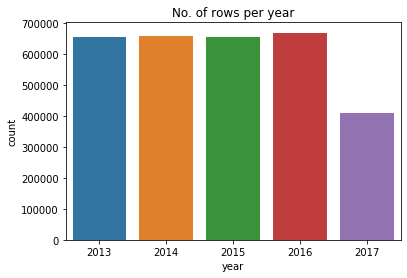

In [ ]:
plt.title('No. of rows per year')
sns.countplot(x=train_df['year']);

### Family

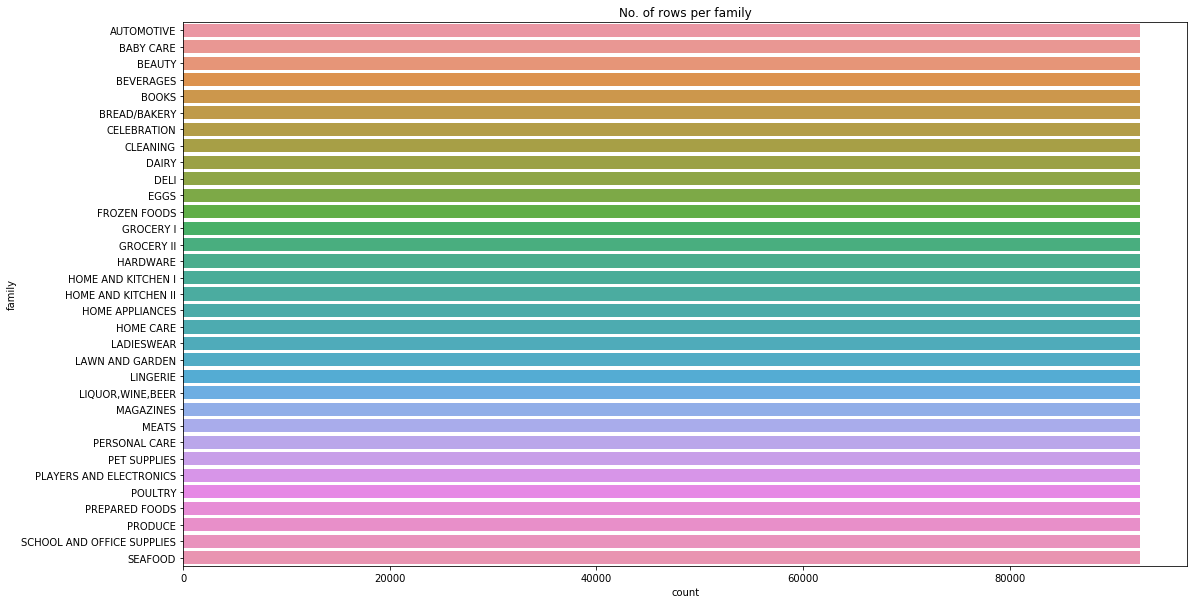

In [ ]:
plt.figure(figsize=(18,10))
plt.title('No. of rows per family')
sns.countplot(y=train_df.family);

### Store_nbr

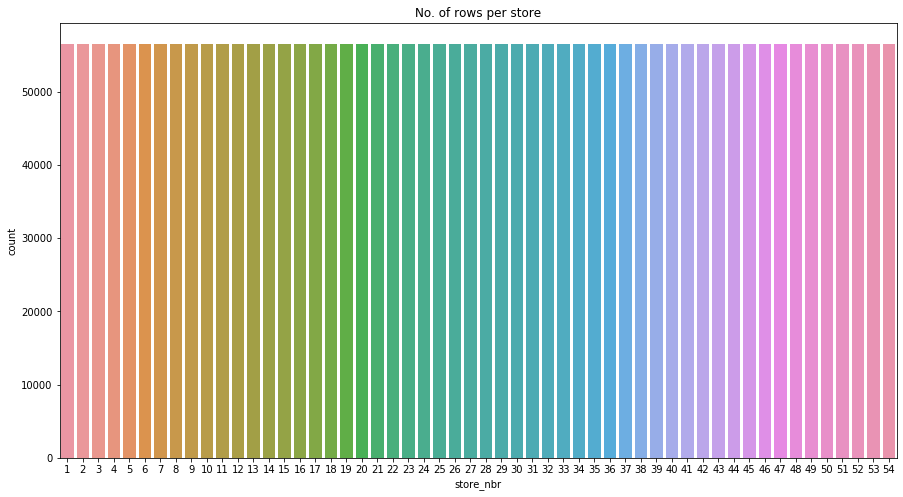

In [ ]:
plt.figure(figsize=(15,8))
plt.title('No. of rows per store')
sns.countplot(x=train_df.store_nbr);

### onpromotion

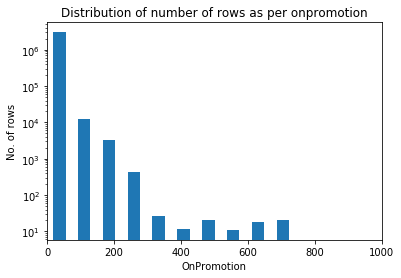

In [ ]:
plt.title('Distribution of number of rows as per onpromotion')
plt.xlim(0,1000)
plt.xlabel('OnPromotion')
plt.ylabel('No. of rows')
plt.yscale('log')
plt.hist(x=train_df.onpromotion,rwidth=0.5);

### Sales

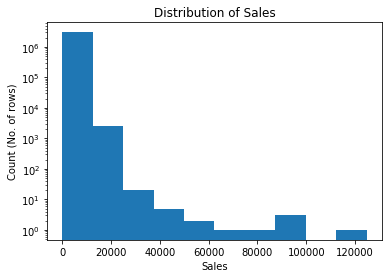

In [ ]:
plt.title('Distribution of Sales')
plt.yscale("log")
#plt.xlim(0,30000)
plt.xlabel('Sales')
plt.ylabel('Count (No. of rows)')
plt.hist(x=train_df.sales);

### Distribution of daily Oilprice

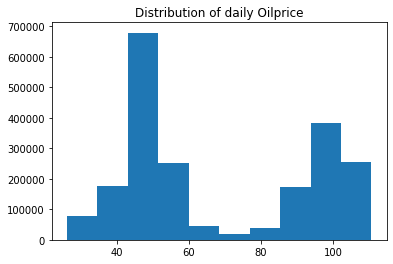

In [ ]:
plt.title('Distribution of daily Oilprice')
plt.hist(x=train_df.dcoilwtico);

### Store_nbr vs sales

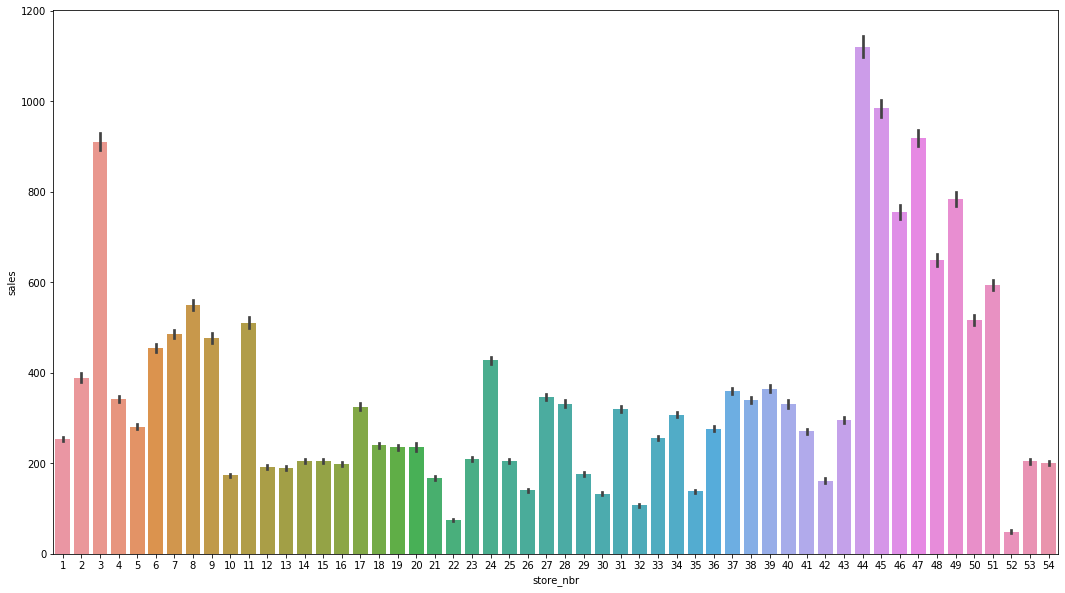

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x=train_df.store_nbr,y=train_df.sales);

### Family vs sales

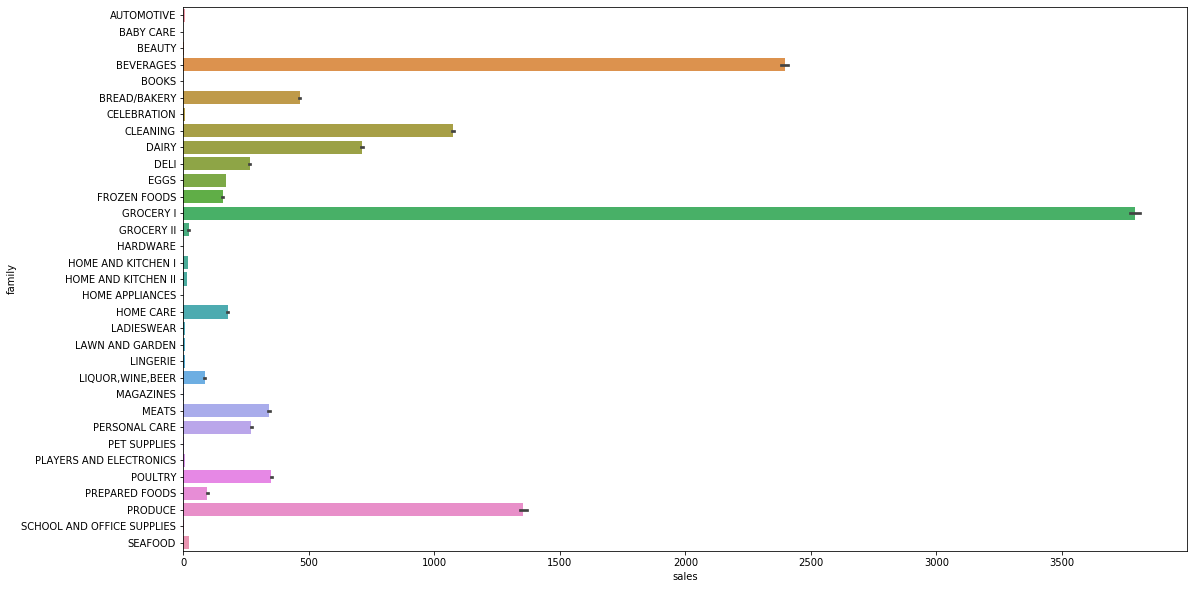

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(y=train_df.family,x=train_df.sales);

### Transactions vs sales

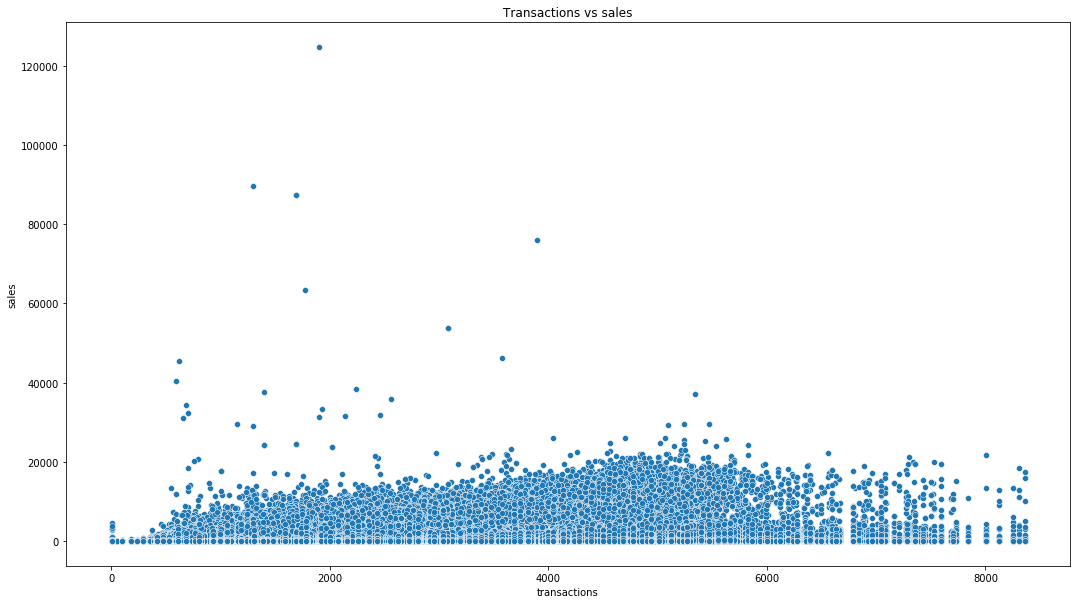

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Transactions vs sales')
sns.scatterplot(x=train_df.transactions,y=train_df.sales);

### Monthwise sales

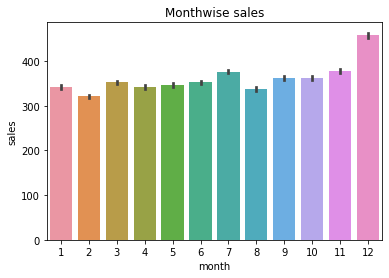

In [ ]:
plt.title('Monthwise sales')
sns.barplot(x=train_df.month,y=train_df.sales);

### Daywise sales

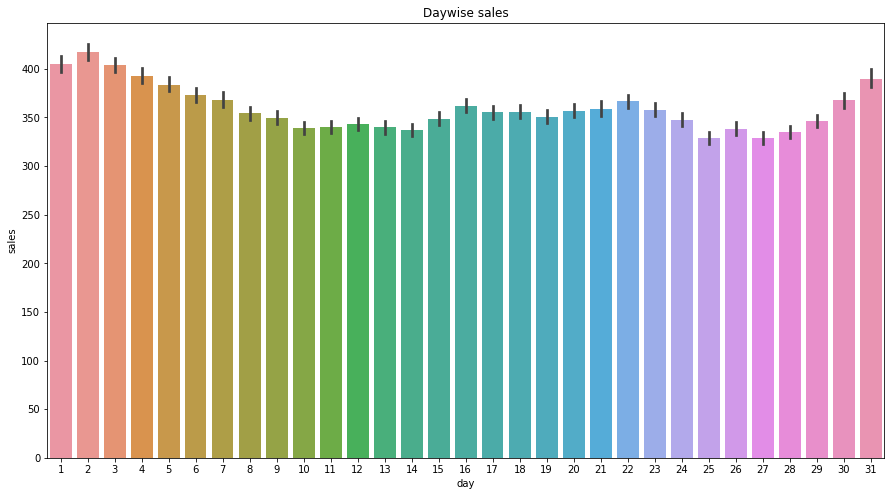

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Daywise sales')
sns.barplot(x=train_df.day,y=train_df.sales);

### Clustrer vs sales

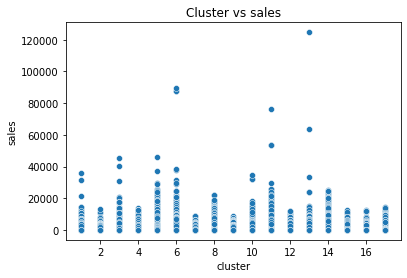

In [ ]:
plt.title('Cluster vs sales')
sns.scatterplot(x=train_df.cluster,y=train_df.sales);

### weekday vs sales

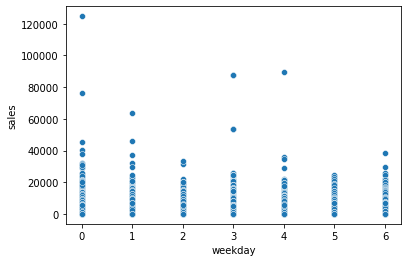

In [ ]:
sns.scatterplot(x=train_df.weekday,y=train_df.sales);

### Daily Oilprice vs sales


In [ ]:
train_df.columns

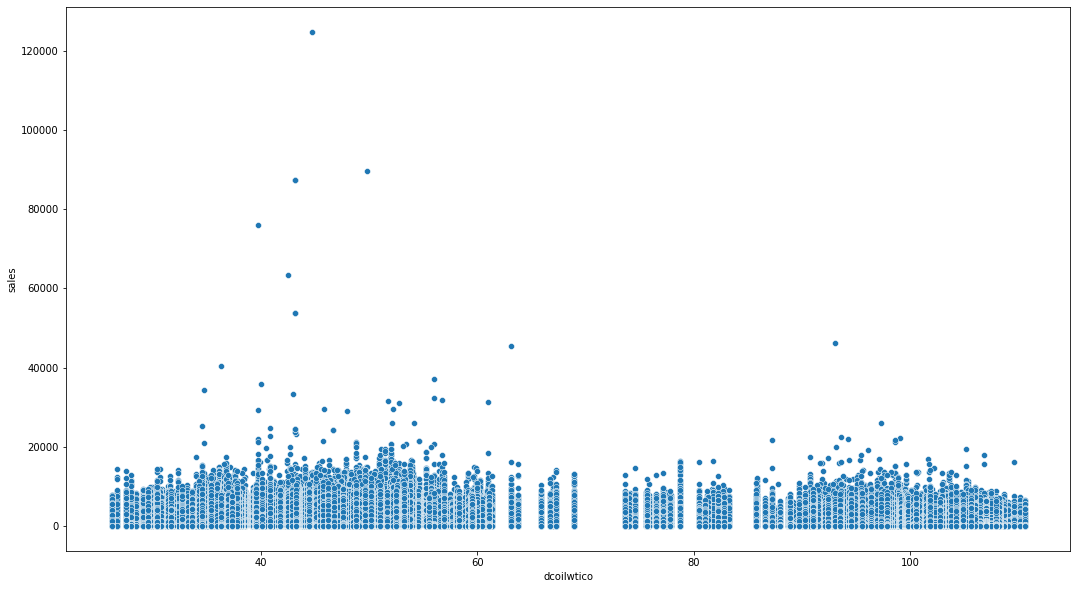

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(x=train_df.dcoilwtico,y=train_df.sales);

### locale vs sales

In [ ]:
plt.title('Holidaywise sales')
sns.barplot(x=train_df.locale,y=train_df.sales);

#### Holiday type (type_y) vs sales

In [ ]:
sns.barplot(x=train_df.type_y,y=train_df.sales);

#### Store type (type_x) vs sales

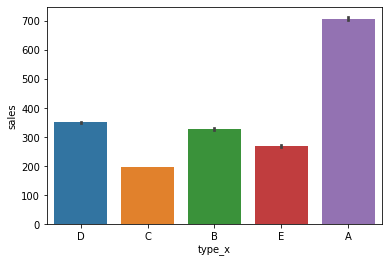

In [ ]:
sns.barplot(x=train_df.type_x,y=train_df.sales);

### Citywise sales

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30)
sns.barplot(x=train_df.city,y=train_df.sales);

### Statewise sales

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=30)
sns.barplot(x=train_df.state,y=train_df.sales);

#### Transferred vs sales

In [ ]:
sns.barplot(x=train_df.transferred,y=train_df.sales);

### Correlation between 2 variables

In [ ]:
import numpy as np

In [ ]:
plt.figure(figsize=(18,10))
dataplot = sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)

There is positive correlation in transactions and sales. Therefore, it is good to drop transactions from the train_df as the model can get the idea of sales from transactions feature.

In [ ]:
train_df=train_df.drop(['transactions'],axis=1)

In [ ]:
test_df=test_df.drop(['transactions'],axis=1)

## Ask & Answer Questions
1. Which month has the highest sales? Which day of the month has highest sales? Which weekday has the highest sales? 

3. Is there any relation between transaction and sales?
4. Which store number has highest sales? Which city, state has highest sales? 

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Monthwise sales')
sns.barplot(x=train_df.month,y=train_df.sales);

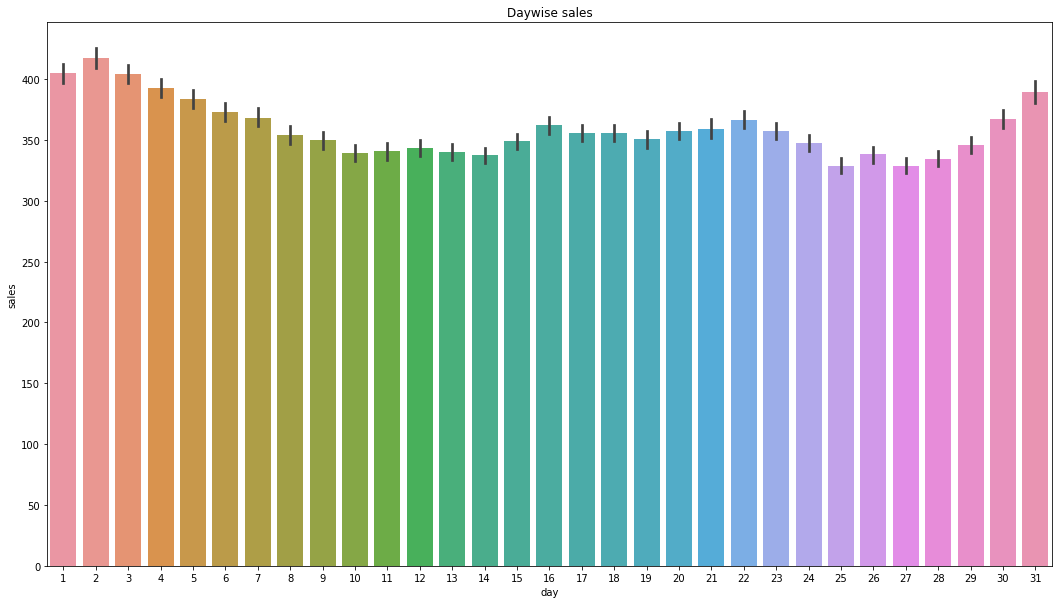

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Daywise sales')
sns.barplot(x=train_df.day,y=train_df.sales);

In [ ]:
plt.title('Weekday sales')
sns.barplot(x=train_df.weekday,y=train_df.sales);

#### 2. What is the trend of sales according to years? Does the same trend follows for different kinds of products (Family) also?

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Yearwise sales')
sns.lineplot(x=train_df.year,y=train_df.sales);

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Year vs sales for different kinds of Products')
sns.lineplot(x=train_df.year,y=train_df.sales,hue=train_df.family);

# 3. Prepare the dataset for ML training

Steps:
* Split Training & Validation Set
* Fill/Remove Missing Values
* Extract Inputs & Outputs
 * Training
 * Validation
 * Test

## Spliting Training & Validation Set

We will set aside the data having year 2017 for validation set as this is time-series dataset so we can't just randomly put aside 20% of the dataset for validation.

In [ ]:
train_df

In [ ]:
train_df,val_df=train_df[train_df['year']<2017],train_df[train_df['year']==2017]

In [ ]:
train_df.shape,val_df.shape

## Fill/Remove Missing Values

There is no missing values in our dataset, but if there would we could simply drop the rows instead of trying to fill them (since we have a lot of training data) 

In [ ]:
train_df.isna().sum()*100/len(train_df)

Being more than 50% of the data missing for type_y, locale, locale_name, description, transferred, it is neither good to impute these columns nor to have these columns for the prediction. Let's drop these columns from the train_df.

In [ ]:
train_df=train_df.drop(['type_y','locale','locale_name','description','transferred'],axis=1)

In [ ]:
train_df.isna().sum()/len(train_df)

In [ ]:
val_df=val_df.drop(['type_y','locale','locale_name','description','transferred'],axis=1)

In [ ]:
val_df.isna().sum()

In [ ]:
test_df=test_df.drop(['type_y','locale','locale_name','description','transferred'],axis=1)

In [ ]:
test_df.isna().sum()

In [ ]:
train_df.info()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean')

In [ ]:
imputing_col=['dcoilwtico']
imputer.fit(train_df[imputing_col])

In [ ]:
train_df[imputing_col]=imputer.transform(train_df[imputing_col])

In [ ]:
train_df.isna().sum()

In [ ]:
imputer.fit(val_df[imputing_col])

In [ ]:
val_df[imputing_col]=imputer.transform(val_df[imputing_col])

In [ ]:
val_df.isna().sum()

In [ ]:
imputer.fit(test_df[imputing_col])

In [ ]:
test_df[imputing_col]=imputer.transform(test_df[imputing_col])

In [ ]:
test_df.isna().sum()

## Extract Inputs & Outputs

In [ ]:
train_df.info()

In [ ]:
train_df[['store_nbr','year','month','day','weekday','cluster']]=train_df[['store_nbr','year','month','day','weekday','cluster']].astype('object')

In [ ]:
val_df[['store_nbr','year','month','day','weekday','cluster']]=val_df[['store_nbr','year','month','day','weekday','cluster']].astype('object')

In [ ]:
test_df[['store_nbr','year','month','day','weekday','cluster']]=test_df[['store_nbr','year','month','day','weekday','cluster']].astype('object')

In [ ]:
train_df.info()

In [ ]:
val_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.columns

In [ ]:
input_cols=['store_nbr', 'family', 'onpromotion', 'year','weekday', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico']

In [ ]:
target_col= 'sales'

## Training 

In [ ]:
train_inputs=train_df[input_cols]

In [ ]:
train_targets=train_df[target_col]

In [ ]:
train_inputs

In [ ]:
train_targets

## Validation

In [ ]:
val_inputs=val_df[input_cols]

In [ ]:
val_inputs.info()

In [ ]:
val_targets=val_df[target_col]

In [ ]:
val_inputs

In [ ]:
val_targets

## Test

In [ ]:
test_inputs=test_df[input_cols]

In [ ]:
test_inputs

# Train Hardcoded & Baseline Models

* Hardcoded model: Always predict average sales
* Baseline model: Linear regression

For evaluation the dataset uses Root Mean Squared Logarithmic Error (RMSLE): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predict the average.

In [ ]:
import numpy as np

In [ ]:
class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()

  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)


In [ ]:
mean_model=MeanRegressor()

In [ ]:
mean_model.fit(train_df,train_targets)

In [ ]:
train_preds=mean_model.predict(train_df)

In [ ]:
train_preds

In [ ]:
val_preds=mean_model.predict(val_df)

In [ ]:
val_preds

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
def rmsle(targets,preds):
  return mean_squared_log_error(targets,preds,squared=False)

In [ ]:
train_targets

In [ ]:
train_rmsle=rmsle(train_targets,train_preds)

In [ ]:
train_rmsle

In [ ]:
val_rmsle=rmsle(val_targets,val_preds)

In [ ]:
val_rmsle

Our dump hard-coded model is off by $3.402 on average, which is pretty good considering the average sale is 339.994. 

## Feature Scaling

In [ ]:
train_df.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [ ]:
categorical_cols=['store_nbr','weekday','city','state','type_x','cluster']
numerical_cols=['onpromotion','dcoilwtico']

In [ ]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:
encoder.fit(train_df[categorical_cols])

In [ ]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

In [ ]:
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols])

In [ ]:
encoder.fit(val_df[categorical_cols])

In [ ]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

In [ ]:
val_df[encoded_cols]=encoder.transform(val_df[categorical_cols])

In [ ]:
val_df

In [ ]:
encoder.fit(test_df[categorical_cols])

In [ ]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

In [ ]:
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols])

In [ ]:
test_df

## Train & Evaluate Baseline Model

We'll train linear regression model as our baseline model, which tries to express the targets as the weighted sum of inputs.

In [ ]:
numeric_cols=['onpromotion','dcoilwtico']
categorical_cols=encoded_cols

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model=LinearRegression()

In [ ]:
train_df.columns

In [ ]:
linear_model.fit(train_df[numeric_cols],train_targets)

In [ ]:
train_preds=linear_model.predict(train_df[numeric_cols])

In [ ]:
rmsle(train_targets,train_preds)

In [ ]:
val_preds=linear_model.predict(val_inputs[numeric_cols])

In [ ]:
rmsle(val_targets,val_preds)

The linear regression model is off by $3.23, which isn't much better than simply predicting the averages.

This is mainly because the training data is not in a format that's useful for the model, and we're not using informations like Family, store location, year, month and other useful information.

However, now we have a baseline model that our other models should ideally beat.

In [ ]:
X_train=train_df[encoded_cols+numeric_cols]
X_val=val_df[encoded_cols+numeric_cols]
X_test=test_df[encoded_cols+numeric_cols]

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree=DecisionTreeRegressor(random_state=42)

In [ ]:
tree.fit(X_train,train_targets)

In [ ]:
tree_train_preds=tree.predict(X_train)

In [ ]:
rmsle(train_targets,tree_train_preds)

In [ ]:
tree_val_preds=tree.predict(X_val)

In [ ]:
rmsle(val_targets,tree_val_preds)

In [ ]:
tree2=DecisionTreeRegressor(random_state=42,max_depth=20)

In [ ]:
tree2.fit(X_train,train_targets)

In [ ]:
tree2_train_preds=tree2.predict(X_train)

In [ ]:
rmsle(train_targets,tree2_train_preds)

In [ ]:
tree2_val_preds=tree2.predict(X_val)

In [ ]:
rmsle(val_targets,tree2_val_preds)

#### RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1,random_state=42)

In [ ]:
rf1.fit(X_train,train_targets)

In [ ]:
rf1_train_predicts=rf1.predict(X_train)

In [ ]:
rf1_train_rmsle=rmsle(train_targets,rf1_train_predicts)

In [ ]:
rf1_val_predicts=rf1.predict(X_val)

In [ ]:
rf1_val_rmsle=rmsle(val_targets,rf1_val_predicts)

## 5. Make Predictions and Submit to Kaggle

* Make predictions for test set
* Generate submission csv
* Submit to Kaggle
* Record in experiment tracking sheet

In [ ]:
test_inputs

In [ ]:
def predict_and_submit(model,test_inputs,fname):
  test_preds=model.predict(test_inputs)
  sub_df=pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['sales']=test_preds
  sub_df.to_csv(fname,index=None)
  return sub_df

In [ ]:
predict_and_submit(tree,X_test,'decision_tree_submission.csv')

In [ ]:
predict_and_submit(tree2,X_test,'decision_tree2_submission.csv')

In [ ]:
predict_and_submit(tree2,X_test,'random_forest_1_submission.csv')